# <font color='black'>Data Pre-Processing</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas.plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.pyplot import hist

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



df = pd.read_csv(r'FootballTransfersSummer22.csv')

# <font color='black'>Loading Our Data Set</font>

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,â‚¬42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD AlmerÃ­a,LaLiga,Spain,Real Sociedad,LaLiga,Spain,â‚¬18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,â‚¬50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,â‚¬30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,â‚¬10.00m,9/1/2022


In [ ]:
x=df.copy()

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest


# Extract the "costs of players" column
costs = df['cost'].values.reshape(-1, 1)

# Train the isolation forest model
model = IsolationForest(n_estimators=100, contamination=0.01)
model.fit(costs)

# Predict the anomalies
anomalies = model.predict(costs)

# Create a dataframe with the anomalies
anomalies_d = df[anomalies == -1]
#anomalies_df = data.loc[anomalies == -1, ['name', 'cost', 'position', 'age','new_club','origin_club','league_origin_club','league_new_club','country_origin_club', 'country_new_club','date_of_transfer']]

anomalies_d = anomalies_d.drop(['Goalkeeper', 'Left Midfield','midfield','attack','Second Striker','Right-Back','Attacking Midfield','Left-Back','Right Midfield'], axis=1)
# Print the anomalies dataframe
# Set the "name"
print('Total outliers:', len(anomalies_d))
print(anomalies_d)


Total outliers: 10
            cost            position  age league_origin_club league_new_club  \
19252  150000000      Centre-Forward   21         Bundesliga  Premier League   
15126   70000000         Left Winger   27     Premier League  Premier League   
19251   55000000      Centre-Forward   23      Liga Portugal  Premier League   
9425    60000000         Centre-Back   23             LaLiga          LaLiga   
19250   60000000  Defensive Midfield   22            Ligue 1          LaLiga   
1152    55000000    Central Midfield   26            Serie A         Ligue 1   
19303   70000000      Centre-Forward   29     Premier League         Serie A   
19255   65000000        Right Winger   24            Serie A         Serie A   
12700   70000000         Centre-Back   22            Serie A      Bundesliga   
19261   70000000         Left Winger   30     Premier League      Bundesliga   

      country_origin_club country_new_club             new_club  \
19252             Germany        

# <font color='black'>Changing The Players Status to Free Agent</font>

In [ ]:
df['origin_club'].loc[df['origin_club']=='Without Club'].replace('Without Club', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Disqualification'].replace('Disqualification', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Career Break'].replace('Career Break', 'Free Agent', inplace= True)
df['origin_club'].loc[df['origin_club']=='Unknown'].replace('Unknown', 'Free Agent', inplace= True)

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,â‚¬42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD AlmerÃ­a,LaLiga,Spain,Real Sociedad,LaLiga,Spain,â‚¬18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,â‚¬50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,â‚¬30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,â‚¬10.00m,9/1/2022


In [ ]:
df.isnull().sum()

name                      0
position                  0
age                     143
origin_club               0
league_origin_club      929
country_origin_club     929
new_club                  0
league_new_club        5570
country_new_club       5570
cost                      0
date_of_transfer          0
dtype: int64

# <font color='black'>Filling The Nulls</font>

In [ ]:
df['league_origin_club'].fillna(value = 'Free Agent')
df['country_origin_club'].fillna(value = 'Free Agent')

0            France
1             Spain
2             Spain
3           Germany
4            France
            ...    
33620    Kazakhstan
33621       Romania
33622       Romania
33623      Bulgaria
33624       Tunisia
Name: country_origin_club, Length: 33625, dtype: object

In [ ]:
df['league_origin_club']= df['league_origin_club'].fillna(method ='pad', axis=0)
df['country_origin_club']= df['country_origin_club'].fillna(method ='pad', axis=0)
df['league_new_club']= df['league_new_club'].fillna(method ='pad', axis=0)
df['country_new_club']= df['country_new_club'].fillna(method ='pad', axis=0)
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,â‚¬42.00m,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD AlmerÃ­a,LaLiga,Spain,Real Sociedad,LaLiga,Spain,â‚¬18.00m,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,â‚¬50.00m,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,â‚¬30.00m,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,â‚¬10.00m,9/1/2022


In [ ]:
df.isnull().sum()

name                     0
position                 0
age                    143
origin_club              0
league_origin_club       0
country_origin_club      0
new_club                 0
league_new_club          0
country_new_club         0
cost                     0
date_of_transfer         0
dtype: int64

In [ ]:
df.dtypes

name                    object
position                object
age                    float64
origin_club             object
league_origin_club      object
country_origin_club     object
new_club                object
league_new_club         object
country_new_club        object
cost                    object
date_of_transfer        object
dtype: object

# <font color='black'>Changing The DataTypes Of Columns</font>

In [ ]:
import unicodedata
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')
        if x[0] == '€':
            x = x[1:]
        return x.replace('.', '').replace('m', '0000').replace('Th','0').replace('a','')
    return x


In [ ]:
df['cost'] = df['cost'].apply(clean_currency).astype('float')

In [ ]:
df['cost']=df['cost'].astype('long')

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
0,Amine Gouiri,Centre-Forward,22.0,OGC Nice,Ligue 1,France,Stade Rennais FC,Ligue 1,France,42000000,9/1/2022
1,Umar Sadiq,Centre-Forward,25.0,UD AlmerÃ­a,LaLiga,Spain,Real Sociedad,LaLiga,Spain,18000000,9/1/2022
2,Carlos Soler,Central Midfield,25.0,Valencia CF,LaLiga,Spain,Paris Saint-Germain,Ligue 1,France,50000000,9/1/2022
3,Manuel Akanji,Centre-Back,27.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,30000000,9/1/2022
4,Wout Faes,Centre-Back,24.0,Stade Reims,Ligue 1,France,Leicester City,Premier League,England,10000000,9/1/2022


In [ ]:
df = df.sort_values(by:=['cost'], inplace=False, ascending=False)

In [ ]:
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'])

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21.0,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22.0,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30.0,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29.0,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27.0,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


In [ ]:
df['age'].unique()

array([21., 22., 30., 29., 27., 24., 23., 26., 25., 33., 20., 28., 31.,
       19., 18., 32., 34., 35., 17., 37., 36., 39., 16., 38., 40., nan,
       43., 42., 41., 45., 15., 44., 46.])

# <font color='black'>Getting Rid of the Nulls</font>

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
cost                   0
date_of_transfer       0
dtype: int64

In [ ]:
df['age'] = df['age'].astype('int64')

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


# <font color='black'>Showing All the Transfers OUT And Into The Top 5 leagues</font>

In [ ]:
PremierLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
    | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

Liga = df[(df['league_origin_club']=='La Liga') & (df['country_origin_club']== 'Spain')
    | (df['league_new_club']=='La Liga') & (df['country_new_club']== 'Spain')]



Ligue1 = df[(df['league_origin_club']=='Ligue 1') & (df['country_origin_club']== 'France')
   | (df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


SerieA = df[(df['league_origin_club']=='Serie A') & (df['country_origin_club']== 'Italy')
    | (df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


BundesLiga = df[(df['league_origin_club']=='Bundesliga') & (df['country_origin_club']== 'Germany')
    | (df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]



In [ ]:
EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

In [ ]:
EgyptianLeague

,cost,position,age,league_origin_club,league_new_club,country_origin_club,country_new_club,new_club,origin_club,date_of_transfer,...,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker,attack,midfield


In [ ]:
TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
TransfersTop5.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio ManÃ©,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin NÃºÃ±ez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


## <font color='black'>Showing The Transfer Market For The Premier League Only</font>

In [ ]:
df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'England')
    | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')].head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
19261,Sadio ManÃ©,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin NÃºÃ±ez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01


### <font color='black'>Number of Players Transfered Under the Age Of 30</font>

In [ ]:
AgePreferance = df[(df['age'] < 30)]
len(AgePreferance.index)

27025

### <font color='black'>Number of Players Transfered Above the Age Of 30</font>

In [ ]:
Age_Preferance = df[(df['age'] >= 30)]
len(Age_Preferance.index)

6457

### <font color='black'>Number of Players Purchased According To Their Positions</font>

In [ ]:
TransfersTop5['position'].value_counts().head(13)

Centre-Back           347
Centre-Forward        281
Central Midfield      248
Goalkeeper            193
Right-Back            154
Left-Back             147
Left Winger           137
Defensive Midfield    136
Attacking Midfield    107
Right Winger           96
Second Striker         22
Left Midfield          19
Right Midfield         18
Name: position, dtype: int64

In [ ]:
AttackingPositions = df[
    (df['position'] == 'Centre-Forward')
    | (df['position'] =='Left Winger')
    | (df['position'] =='Right Winger')
    | (df['position'] =='attack')
    | (df['position'] =='Second Striker')]
len(AttackingPositions.index)

10015

In [ ]:
MidfieldPositions = df[
    (df['position'] == 'Central Midfield')
 |  (df['position'] =='Defensive Midfield')
 |  (df['position'] =='Left Midfield')
 |  (df['position'] =='Right Midfield')
 |  (df['position'] =='Attacking Midfield')
 |  (df['position'] =='midfield')]
len(MidfieldPositions.index)

9778

In [ ]:
DefendingPositions = df[
    (df['position'] == 'defence')
    | (df['position'] =='Centre-Back')
    | (df['position'] =='Left-Back')
    | (df['position'] =='Right-Back')
    | (df['position'] =='Goalkeeper')]
len(DefendingPositions.index)

13689

In [ ]:
df.head()

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
12700,Matthijs de Ligt,Centre-Back,22,Juventus FC,Serie A,Italy,Bayern Munich,Bundesliga,Germany,70000000,2022-07-19
19261,Sadio ManÃ©,Left Winger,30,Liverpool FC,Premier League,England,Bayern Munich,Bundesliga,Germany,70000000,2022-07-01
19303,Romelu Lukaku,Centre-Forward,29,Chelsea FC,Premier League,England,Inter Milan,Serie A,Italy,70000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13


### <font color='black'>Players That Were Only Purchased By The Top 5 leagues</font>

In [ ]:
PremierLeague = df[(df['league_new_club']=='Premier League') & (df['country_new_club']== 'England')]

Liga = df[(df['league_new_club']=='LaLiga') & (df['country_new_club']== 'Spain')]

#EgyptianLeague = df[(df['league_origin_club']=='Premier League') & (df['country_origin_club']== 'Egypt')
 #   | (df['league_new_club']=='Premier League') & (df['country_new_club']== 'Egypt')]

Ligue1 = df[(df['league_new_club']=='Ligue 1') & (df['country_new_club']== 'France')]


SerieA = df[(df['league_new_club']=='Serie A') & (df['country_new_club']== 'Italy')]


BundesLiga = df[(df['league_new_club']=='Bundesliga') & (df['country_new_club']== 'Germany')]


In [ ]:
TransfersTop5 = pd.concat([PremierLeague, Liga, Ligue1, SerieA, BundesLiga])
TransfersTop5

,name,position,age,origin_club,league_origin_club,country_origin_club,new_club,league_new_club,country_new_club,cost,date_of_transfer
19252,Erling Haaland,Centre-Forward,21,Borussia Dortmund,Bundesliga,Germany,Manchester City,Premier League,England,150000000,2022-07-01
15126,Raheem Sterling,Left Winger,27,Manchester City,Premier League,England,Chelsea FC,Premier League,England,70000000,2022-07-13
19251,Darwin NÃºÃ±ez,Centre-Forward,23,SL Benfica,Liga Portugal,Portugal,Liverpool FC,Premier League,England,55000000,2022-07-01
18501,Kalvin Phillips,Defensive Midfield,26,Leeds United,Premier League,England,Manchester City,Premier League,England,50000000,2022-07-04
18500,Gabriel Jesus,Centre-Forward,25,Manchester City,Premier League,England,Arsenal FC,Premier League,England,50000000,2022-07-04
...,...,...,...,...,...,...,...,...,...,...,...
31035,Mihaita Nastase,Centre-Forward,22,ACS Recolta Gheorghe Doja,Romania,Romania,Without Club,Bundesliga,Germany,250,2022-07-01
29434,Adrian Popa,Defensive Midfield,33,CAO 1910 Oradea (2016 - 2022),Romania,Romania,Without Club,Bundesliga,Germany,250,2022-07-01
29424,Zarko Grbovic,attack,27,FK Iskra Danilovgrad,1. CFL,Montenegro,Without Club,Bundesliga,Germany,250,2022-07-01
29431,Matay Birol,Goalkeeper,24,FC GieÃŸen,Hessenliga,Germany,Without Club,Bundesliga,Germany,100,2022-07-01


### <font color='black'>Using Graph Plot To Demonstrate The Time Of Purchases In The Transfer Window</font>

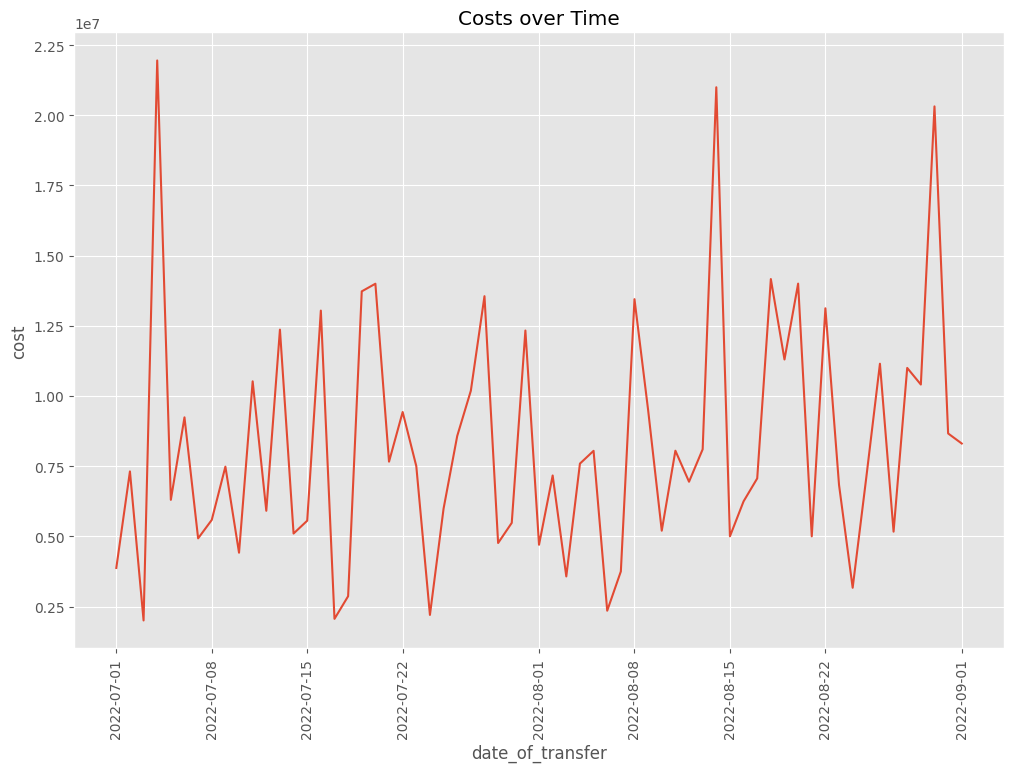

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe


# Convert the 'Date' column to datetime format
TransfersTop5['date_of_transfer'] = pd.to_datetime(TransfersTop5['date_of_transfer'])

# Group the data by date and calculate the mean cost for each day
daily_costs = TransfersTop5.groupby('date_of_transfer')['cost'].mean()

# Filter out the days with no transfers
daily_costs = daily_costs[daily_costs > 0]

# Plot the data
plt.plot(daily_costs.index, daily_costs.values)
plt.xlabel('date_of_transfer')
plt.ylabel('cost')
plt.xticks(rotation='vertical')
plt.title('Costs over Time')
plt.show()


##### <font color='black'>Using Histogram To Demonstrate How Likely To Be Purchased By The Top 5 Leagues If Your Age Is Between 20 And 30</font>

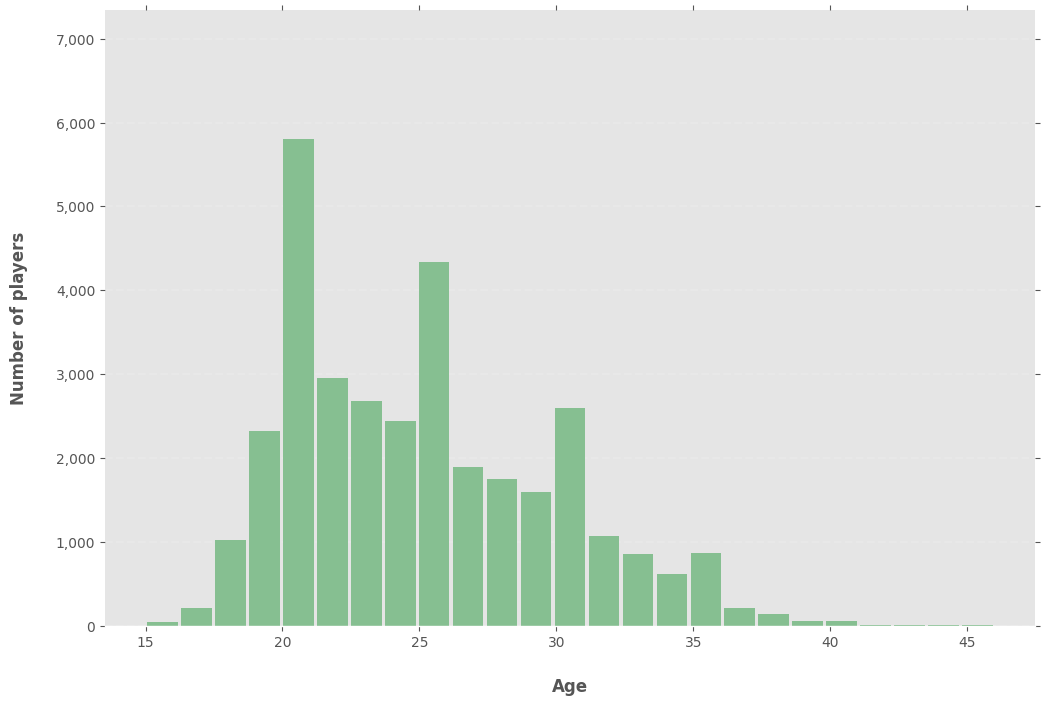

In [ ]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of players", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

### <font color='black'>Showing The Most Expensive Players According To Their Positions Using Bar Plot</font>

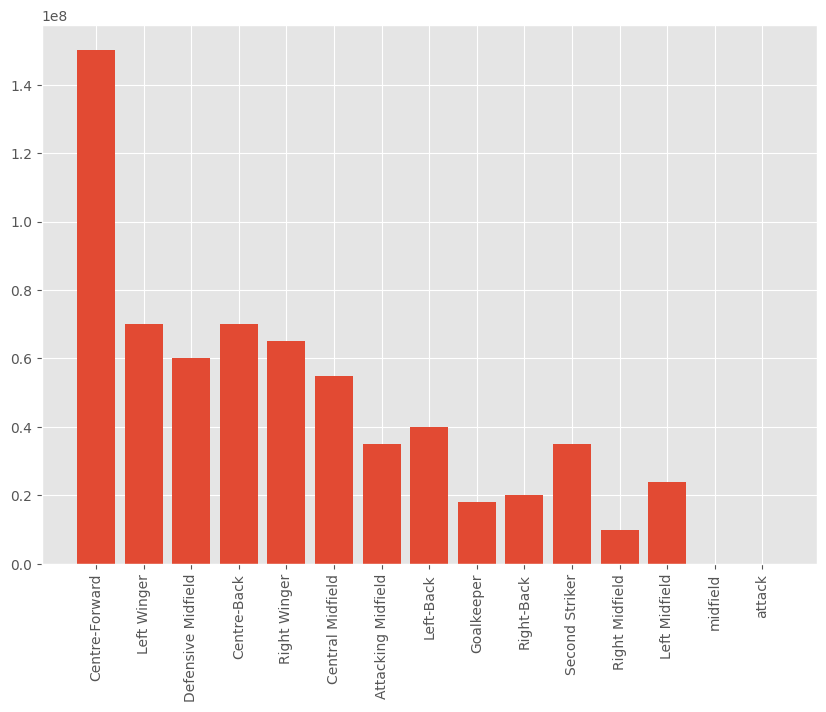

In [ ]:
position = TransfersTop5['position']
cost = TransfersTop5['cost']

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(position, cost)
plt.xticks(rotation = 90)

# Show Plot
plt.show()

### <font color='black'>Showing Which League Has Paid More During The Transfer Window</font>

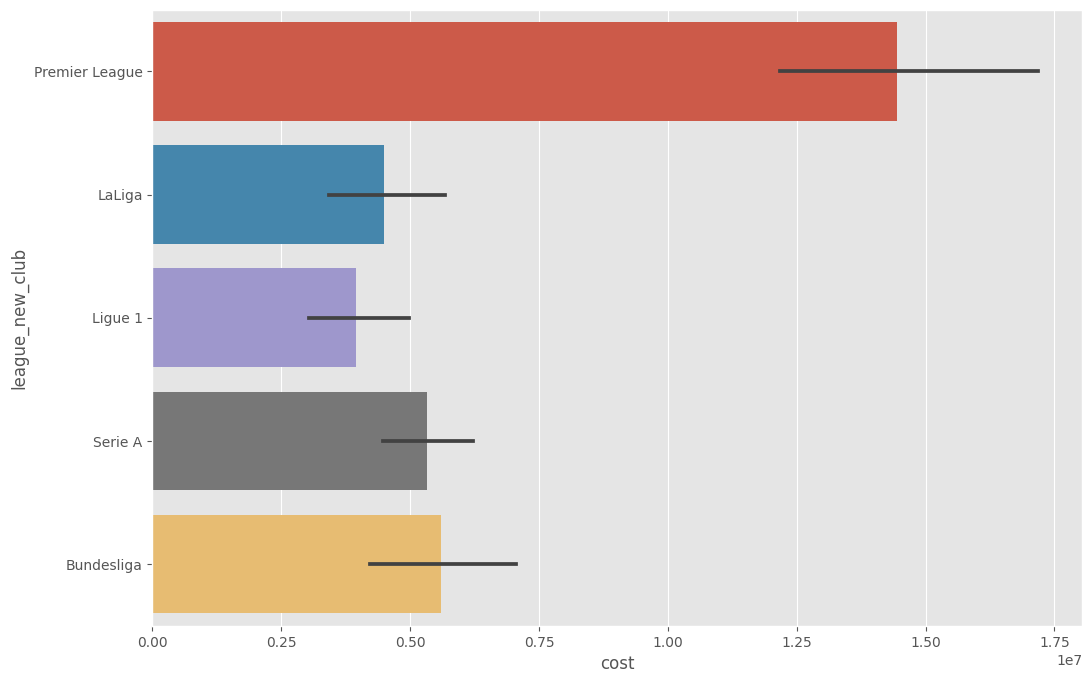

In [ ]:
labels = TransfersTop5['league_new_club']

price = TransfersTop5['cost']

sns.barplot(x=price,y=labels)

plt.show()

plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Load the dataset and perform any necessary data preprocessing

# Select the columns of interest
selected_columns = ['cost', 'position','age', 'league_origin_club', 'league_new_club', 'country_origin_club', 'country_new_club','new_club','origin_club','date_of_transfer']
df = TransfersTop5[selected_columns]

# Create dummy variables for the player's position
position_dummies = pd.get_dummies(df['position'])
df = pd.concat([df, position_dummies], axis=1)

# Drop non-numeric columns and the target column
X = df.drop(['cost', 'position','league_origin_club', 'league_new_club', 'country_origin_club', 'country_new_club','new_club','origin_club','date_of_transfer'], axis=1)
y = df['cost'] > df['cost'].mean()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1800)

# Encode the string columns using pd.get_dummies()
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Perform feature selection using an SVM classifier
svm = SVC(kernel='linear', random_state=42)
selector = SelectFromModel(svm)
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train an SVM classifier using the selected features
svm_selected = SVC(kernel='linear', random_state=42)
svm_selected.fit(X_train_selected, y_train)



y_pred_test = svm_selected.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_accuracy_percent = round(test_accuracy * 100)
print('accuracy-score:',test_accuracy_percent,'%')


accuracy-score: 80 %


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math



# Split the data into training and testing sets
train_df = TransfersTop5.sample(frac=0.95, random_state=1700)
test_df = TransfersTop5.drop(train_df.index)

# Define the features to use for regression
num_features = ['age']
cat_features = ['position', 'league_origin_club', 'country_origin_club', 'league_new_club', 'country_new_club','new_club','origin_club','date_of_transfer']

# Create a preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)])

# Define the dependent and independent variables
X_train = train_df[num_features + cat_features]
y_train = train_df['cost']

# Fit the preprocessing pipeline on the training data
preprocessor.fit(X_train)

# Transform the training data using the fitted pipeline
X_train_transformed = preprocessor.transform(X_train)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=35, learning_rate=0.7, max_depth=6, random_state=1700)

# Train the model on the transformed training data
model.fit(X_train_transformed, y_train)

# Define the independent and dependent variables for the test data
X_test = test_df[num_features + cat_features]
y_test = test_df['cost']

# Transform the test data using the fitted pipeline
X_test_transformed = preprocessor.transform(X_test)

# Evaluate the model on the test data
score = model.score(X_test_transformed, y_test)

# Print the R-squared score rounded up to the nearest whole number
print(f"accuracy-score: {math.ceil(score*100)}%")


accuracy-score: 75%


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt



# Prepare the data
X = TransfersTop5[['age']]
y = TransfersTop5['cost']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)


RMSE: 10741061.555128966
